# *Imports*

In [5]:
#imports
import pandas as pd
import numpy as np

# Required Imports for training models and encoding, scaling, and metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# *Dataset read*

In [6]:
df = pd.read_csv("Dataset.txt")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
rows, cols = df.shape
print("Our dataset have",rows,"rows and",cols,"columns")

Our dataset have 125973 rows and 43 columns


# *Exploring Data*

In [8]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [9]:
df.tail(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
125963,0,tcp,http,SF,334,1600,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal,21
125964,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.0,0.00,0.0,neptune,21
125965,0,tcp,smtp,SF,2233,365,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,normal,19
125966,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,1.00,1.0,0.00,0.0,neptune,21
125967,0,tcp,http,SF,359,375,0,0,0,0,...,1.00,0.00,0.33,0.04,0.33,0.0,0.00,0.0,normal,18
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.00,0.00,0.0,0.00,0.0,normal,21


In [10]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')

In [11]:
df['attack_category'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_category, dtype: int64

In [12]:
df['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [13]:
df['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [14]:
len(df.select_dtypes(include='number').columns)

39

In [15]:
df.isnull()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
for column in df.columns:
    print(f"Number of null values in {column}: {df[column].isnull().sum()}")

Number of null values in duration: 0
Number of null values in protocol_type: 0
Number of null values in service: 0
Number of null values in flag: 0
Number of null values in src_bytes: 0
Number of null values in dst_bytes: 0
Number of null values in land: 0
Number of null values in wrong_fragment: 0
Number of null values in urgent: 0
Number of null values in hot: 0
Number of null values in num_failed_logins: 0
Number of null values in logged_in: 0
Number of null values in num_compromised: 0
Number of null values in root_shell: 0
Number of null values in su_attempted: 0
Number of null values in num_root: 0
Number of null values in num_file_creations: 0
Number of null values in num_shells: 0
Number of null values in num_access_files: 0
Number of null values in num_outbound_cmds: 0
Number of null values in is_host_login: 0
Number of null values in is_guest_login: 0
Number of null values in count: 0
Number of null values in srv_count: 0
Number of null values in serror_rate: 0
Number of null

In [17]:
df.nunique()   # show unique values per column wise

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [18]:
df.duplicated().value_counts()

False    125973
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [21]:
df.describe(include='object')

,protocol_type,service,flag,attack_category
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


In [22]:
def data_proflileing(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        maxval = df[col].max()
        minval = df[col].min()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,maxval,minval,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','maxval','minval','duplicates']
    return data_profile_finding


In [23]:
data_proflileing(df)

,column,dtype,nunique,null,maxval,minval,duplicates
0,duration,int64,2981,0,42908,0,122992
1,protocol_type,object,3,0,udp,icmp,125970
2,service,object,70,0,whois,IRC,125903
3,flag,object,11,0,SH,OTH,125962
4,src_bytes,int64,3341,0,1379963888,0,122632
5,dst_bytes,int64,9326,0,1309937401,0,116647
6,land,int64,2,0,1,0,125971
7,wrong_fragment,int64,3,0,3,0,125970
8,urgent,int64,4,0,3,0,125969
9,hot,int64,28,0,77,0,125945


In [24]:
df.describe(include='object')

,protocol_type,service,flag,attack_category
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


In [25]:
df.duplicated().sum()

0

In [26]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


<AxesSubplot: xlabel='protocol_type', ylabel='count'>

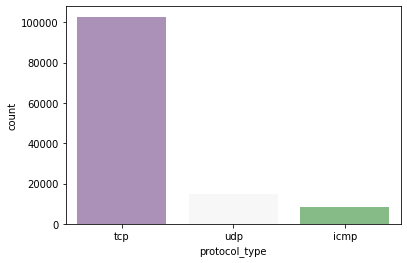

In [27]:
sns.countplot(data=df,x='protocol_type',palette='PRGn')

In [28]:
df['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

<AxesSubplot: xlabel='flag', ylabel='count'>

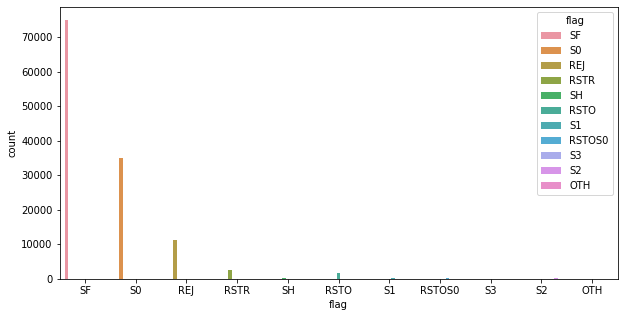

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="flag", hue="flag")

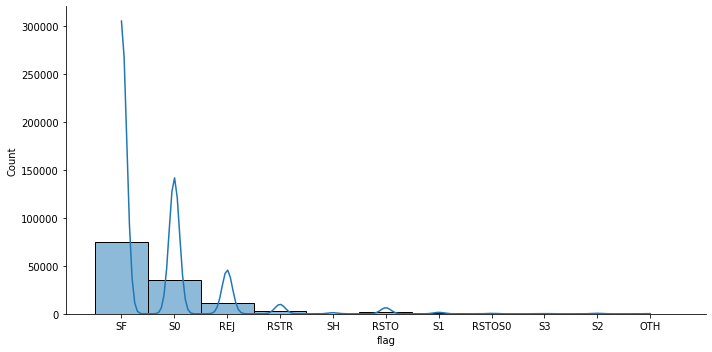

In [30]:
sns.displot(df['flag'], aspect=2, kde=True)   # Imbalance distribution

In [31]:
for col in df.columns:
    # calculate the value_counts for the current column
    vc = df[col].value_counts()
    print(f'Value counts for column "{col}":')
    print(vc)

Value counts for column "duration":
0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: duration, Length: 2981, dtype: int64
Value counts for column "protocol_type":
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
Value counts for column "service":
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64
Value counts for column "flag":
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
Value counts for column "src_bytes":
0        49392
8         3691
1         2432
44        2334
45        2

###  *Removing this Column since all values are zeros*

In [32]:
# Get the columns containing only zeros
zero_cols = df.columns[(df == 0).all()]
# Print the columns containing only zeros
print(zero_cols)


Index(['num_outbound_cmds'], dtype='object')


In [33]:
df['num_outbound_cmds'].value_counts()

0    125973
Name: num_outbound_cmds, dtype: int64

In [34]:
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [35]:
df.shape

(125973, 42)

In [36]:
zero_values_each_column = (df == 0).sum()

print((zero_values_each_column/125973)*100)

duration                       92.047502
protocol_type                   0.000000
service                         0.000000
flag                            0.000000
src_bytes                      39.208402
dst_bytes                      53.953625
land                           99.980154
wrong_fragment                 99.134735
urgent                         99.992856
hot                            97.879704
num_failed_logins              99.903154
logged_in                      60.426441
num_compromised                98.979146
root_shell                     99.865844
su_attempted                   99.936494
num_root                       99.484810
num_file_creations             99.772173
num_shells                     99.962690
num_access_files               99.705492
is_host_login                  99.999206
is_guest_login                 99.057735
count                           0.010320
srv_count                       0.010320
serror_rate                    68.926675
srv_serror_rate 

#  *Outliers for Numerical Columns*

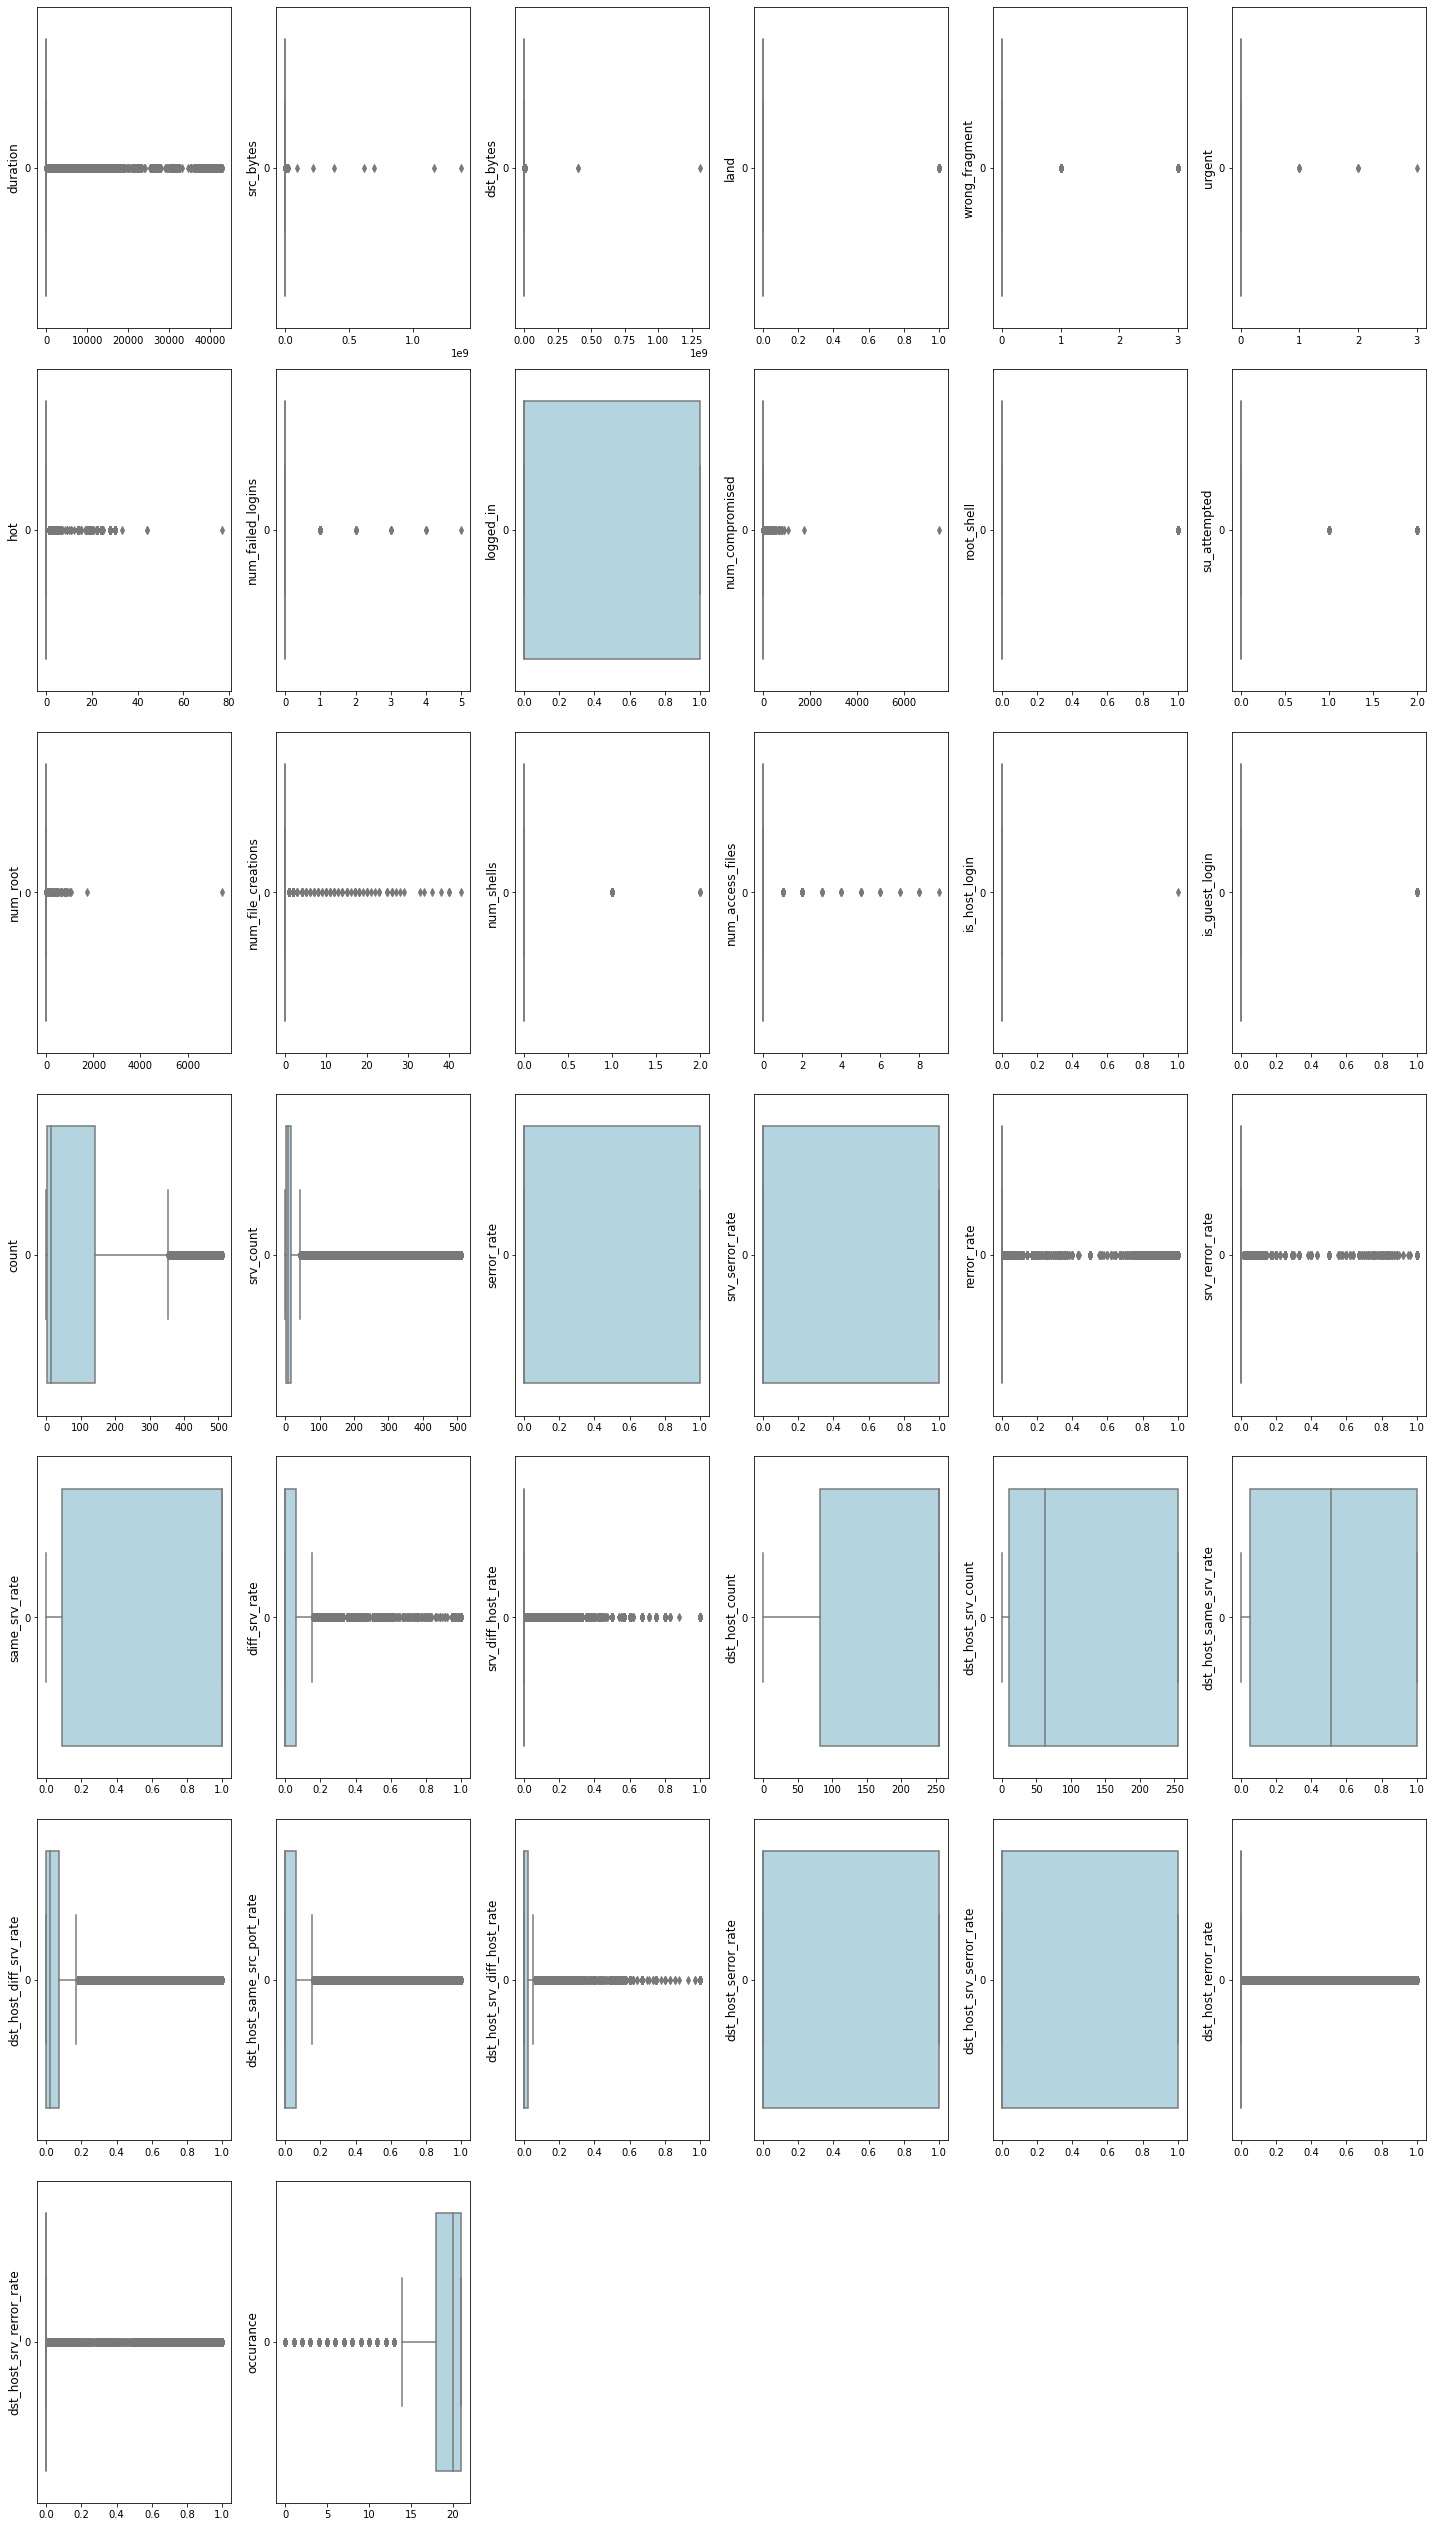

In [37]:
# Set the size of the figure
plt.figure(figsize=(20, 40))
# create a list of columns that are float or int type
num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
# Create subplots for each column
for i, column in enumerate(num_cols):
    plt.subplot(8, 6, i+1) # Define the subplot grid
    sns.boxplot(data=df[column], color='lightblue', orient='h') # Create the boxplot
    plt.ylabel(column, fontsize=12) # Set the y-label as the column name
    plt.tight_layout() # Adjust the spacing between the subplots

plt.show() # Display the plot

In [38]:
df['occurance'].max()

21

In [39]:
df['occurance'].min()

0

<AxesSubplot: xlabel='occurance'>

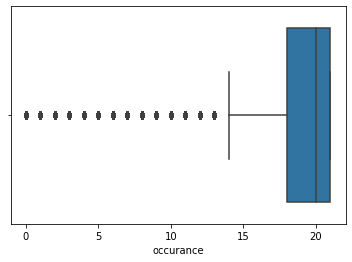

In [40]:
# visualize outliers using different sns plots
sns.boxplot(x=df['occurance']) # boxplot

<AxesSubplot: xlabel='occurance'>

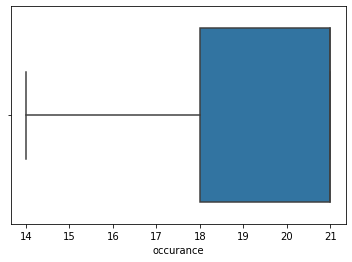

In [41]:
# calculate the IQR for the 'occurance' column
q1 = df['occurance'].quantile(0.25)
q3 = df['occurance'].quantile(0.75)
iqr = q3 - q1

# find the outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['occurance'] >= lower_bound) & (df['occurance'] <= upper_bound)]


# visualize outliers using different sns plots
sns.boxplot(x=df['occurance']) # boxplot

In [42]:
df['occurance'].max()

21

In [43]:
df['occurance'].min()

14

<AxesSubplot: xlabel='num_compromised'>

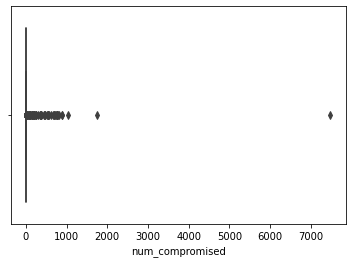

In [44]:
sns.boxplot(x=df['num_compromised']) # boxplot

In [45]:
df['num_compromised'].max(), df['num_compromised'].min()

(7479, 0)

<AxesSubplot: xlabel='num_compromised'>

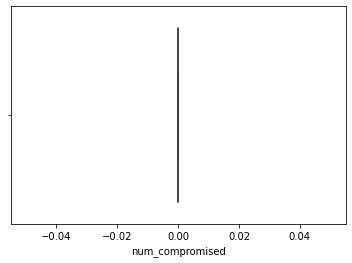

In [46]:
# calculate the IQR for the 'occurance' column
q1 = df['num_compromised'].quantile(0.25)
q3 = df['num_compromised'].quantile(0.75)
iqr = q3 - q1

# find the outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['num_compromised'] >= lower_bound) & (df['num_compromised'] <= upper_bound)]


# visualize outliers using different sns plots
sns.boxplot(x=df['num_compromised']) # boxplot

In [47]:
df['num_compromised'].max(), df['num_compromised'].min()

(0, 0)

<AxesSubplot: xlabel='num_file_creations'>

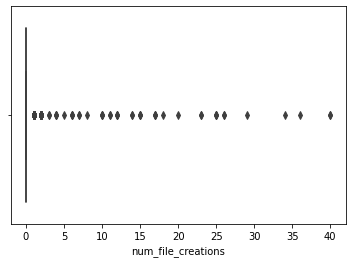

In [48]:
sns.boxplot(x=df['num_file_creations']) # boxplot

In [49]:
df['occurance'].max(), df['occurance'].min()

(21, 14)

<AxesSubplot: xlabel='num_file_creations'>

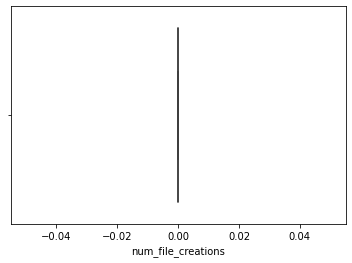

In [50]:
# calculate the IQR for the 'occurance' column
q1 = df['num_file_creations'].quantile(0.25)
q3 = df['num_file_creations'].quantile(0.75)
iqr = q3 - q1

# find the outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['num_file_creations'] >= lower_bound) & (df['num_file_creations'] <= upper_bound)]


# visualize outliers using different sns plots
sns.boxplot(x=df['num_file_creations']) # boxplot

In [51]:
df['occurance'].max(), df['occurance'].min()

(21, 14)

# *Reading Attack_types file 2*

In [52]:
data = pd.read_csv("Attack_types.txt")
data.head()

,attack_category attack_type
0,apache2 dos
1,back dos
2,mailbomb dos
3,processtable dos
4,snmpgetattack dos


In [53]:
# split the "attack_category attack_type" column into two columns
data[['attack_category', 'attack_type']] = data['attack_category attack_type'].str.split(pat=' ', n=1, expand=True)



# drop the original "attack_category attack_type" column
data.drop(columns=['attack_category attack_type'], inplace=True)
data.head(23)

,attack_category,attack_type
0,apache2,dos
1,back,dos
2,mailbomb,dos
3,processtable,dos
4,snmpgetattack,dos
5,teardrop,dos
6,smurf,dos
7,land,dos
8,neptune,dos
9,pod,dos


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   attack_category  41 non-null     object
 1   attack_type      41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [55]:
df['attack_category'].value_counts()

normal          66395
neptune         41190
ipsweep          3464
satan            3386
portsweep        2801
smurf            2634
nmap             1254
teardrop          791
pod               171
warezclient       157
land               17
imap                9
guess_passwd        4
multihop            2
ftp_write           2
warezmaster         2
back                1
loadmodule          1
Name: attack_category, dtype: int64

# *Mapping Attack_Category*

In [56]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [57]:
# Redistribute across common attack class
def change_label(df):
    df.loc[df.attack_category.isin(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']), 'attack_category'] = 'Dos'
    df.loc[df.attack_category.isin(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop']), 'attack_category'] = 'R2L'
    df.loc[df.attack_category.isin(['ipsweep','mscan','nmap','portsweep','saint','satan']), 'attack_category'] = 'Probe'
    df.loc[df.attack_category.isin(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']), 'attack_category'] = 'U2R'


In [58]:
change_label(df)

In [59]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [60]:
df['attack_category'].value_counts()

normal    66395
Dos       44804
Probe     10905
R2L         176
U2R           1
Name: attack_category, dtype: int64

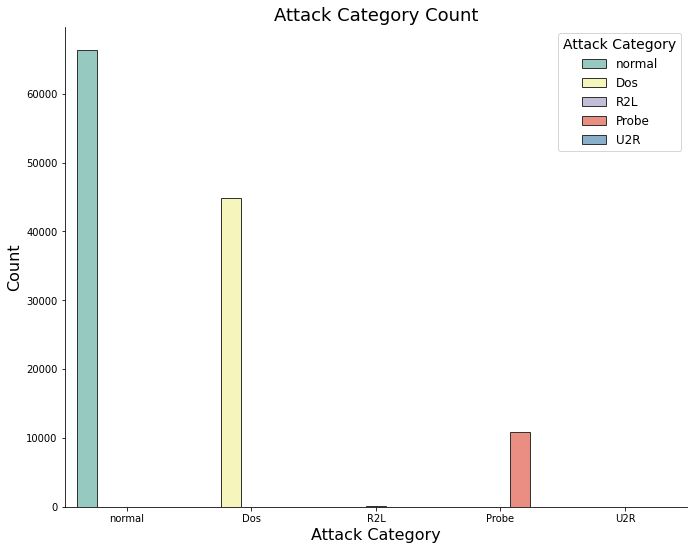

In [61]:
plt.figure(figsize=(10, 8)) # Set the figure size
sns.countplot(data=df, x="attack_category", hue="attack_category", palette="Set3", edgecolor="0.2") # Create the countplot with desired parameters
plt.title("Attack Category Count", fontsize=18) # Add a title to the plot
plt.xlabel("Attack Category", fontsize=16) # Add a label to the x-axis
plt.ylabel("Count", fontsize=16) # Add a label to the y-axis
plt.legend(title="Attack Category", fontsize=12, title_fontsize=14, loc="upper right") # Add a legend
sns.despine() # Remove the top and right spines
plt.tight_layout(pad=2) # Add extra spacing between the plot and the axes
plt.show() # Display the plot


# *Label Encoding for Categorical / Object Columns*

In [62]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].nunique())

protocol_type 3
service 68
flag 11
attack_category 5


In [63]:
# Initialize the label encoder
le = preprocessing.LabelEncoder()

# Encode the target column
df['attack_category'] = le.fit_transform(df['attack_category'])
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

# Print the encoded values
print(df['attack_category'].unique())


[4 0 2 1 3]


In [64]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4,15
2,0,1,48,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,21


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,122281.0,263.547558,2.511365e+03,0.0,0.00,0.00,0.00,42596.0
protocol_type,122281.0,1.052306,4.275576e-01,0.0,1.00,1.00,1.00,2.0
service,122281.0,30.835714,1.585698e+01,0.0,20.00,24.00,48.00,67.0
flag,122281.0,6.944865,2.696452e+00,0.0,5.00,9.00,9.00,10.0
src_bytes,122281.0,13734.853281,2.008106e+06,0.0,0.00,43.00,261.00,693375640.0
dst_bytes,122281.0,2034.407839,3.851135e+04,0.0,0.00,0.00,474.00,7028652.0
land,122281.0,0.000139,1.179007e-02,0.0,0.00,0.00,0.00,1.0
wrong_fragment,122281.0,0.020723,2.426123e-01,0.0,0.00,0.00,0.00,3.0
urgent,122281.0,0.000025,6.394463e-03,0.0,0.00,0.00,0.00,2.0
hot,122281.0,0.134747,1.771011e+00,0.0,0.00,0.00,0.00,30.0


In [66]:
df['protocol_type'].value_counts()

1    99593
2    14542
0     8146
Name: protocol_type, dtype: int64

In [67]:
df['service'].value_counts()

24    39311
48    21409
12     9034
53     7157
20     6151
      ...  
60        5
27        2
3         2
22        2
25        1
Name: service, Length: 68, dtype: int64

In [68]:
df['flag'].value_counts()

9     71831
5     34808
1     11168
4      2239
2      1434
6       276
10      270
7       118
3        92
8        32
0        13
Name: flag, dtype: int64

In [69]:
df['attack_category'].value_counts()

4    66395
0    44804
1    10905
2      176
3        1
Name: attack_category, dtype: int64

#  *Correlation Analysis for given dataset*

In [70]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4,15
2,0,1,48,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,21


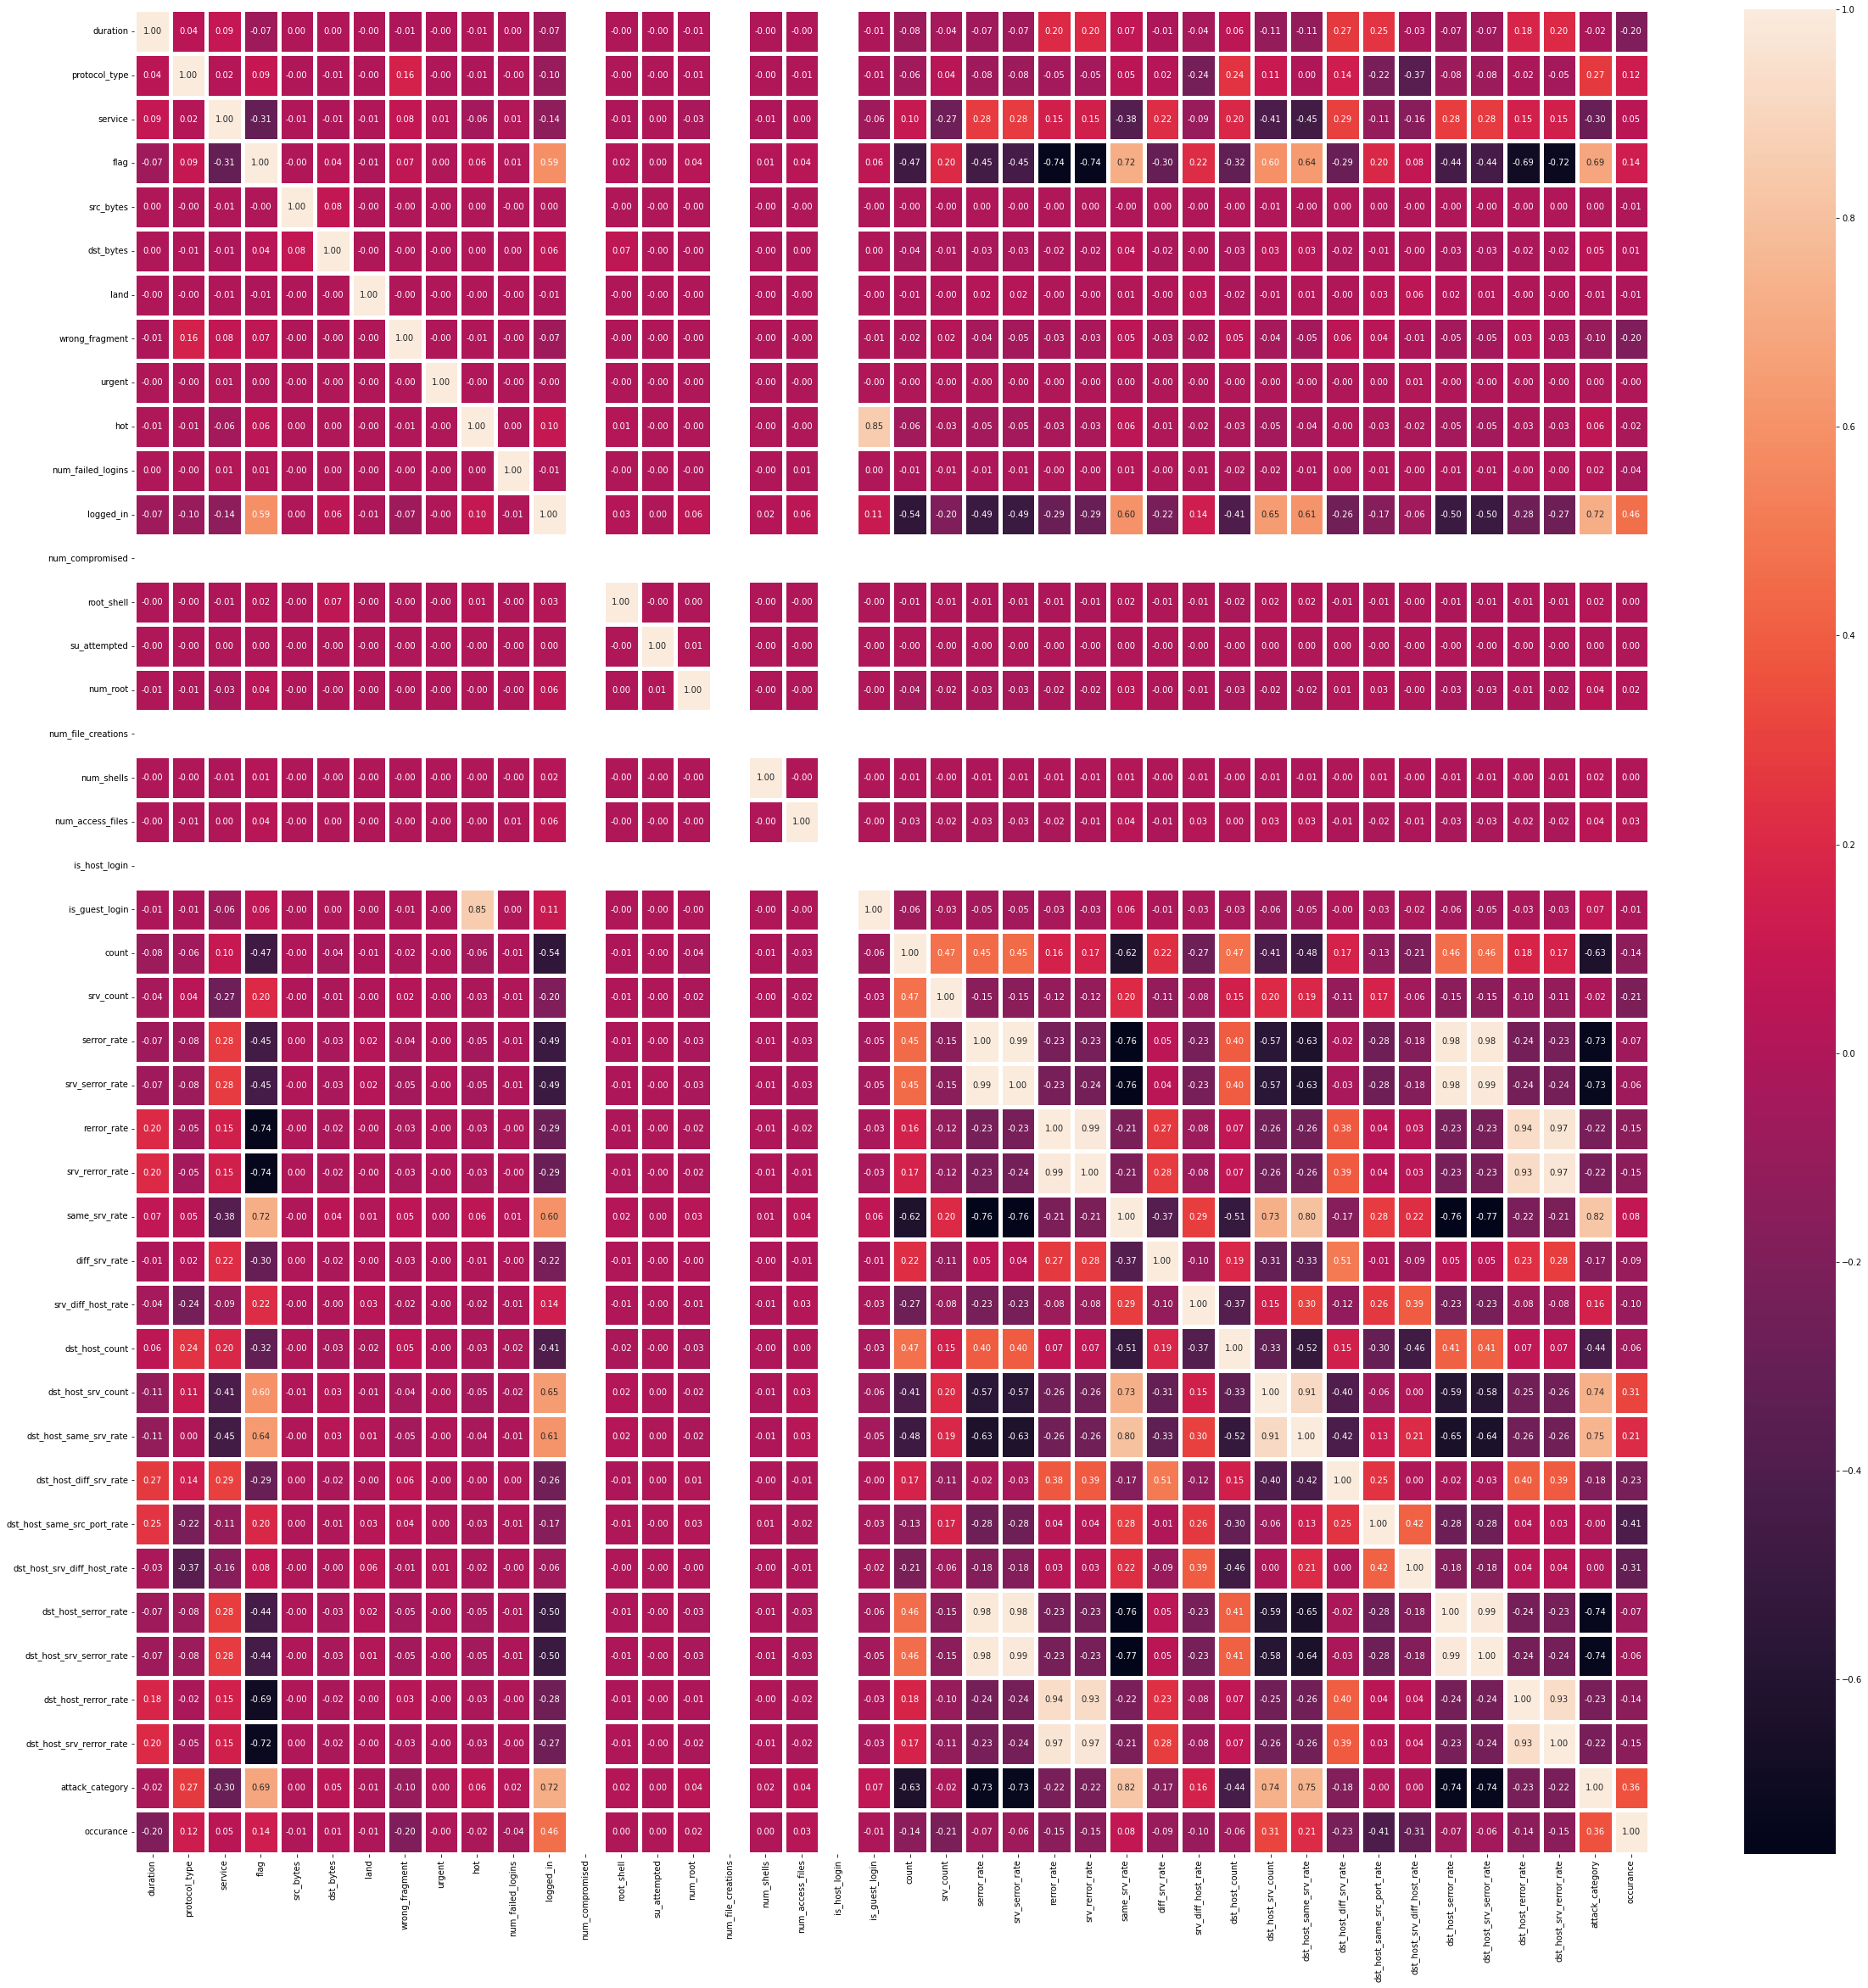

In [71]:
# Compute pairwise correlation of columns
correlation_matrix = df.corr()

# Plot the correlation matrix
#heatmap = sns.heatmap(correlation_matrix,  cbar=True, linewidths=5, annot=True, fmt=".2f")


plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, cbar=True, linewidths=5, annot=True, fmt=".2f")

# Show the plot
plt.show()

#### By analysis through heatmap we have selected the following features for our models

In [72]:
selected_features = ['same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','logged_in','flag','occurance', 
                     'protocol_type','srv_diff_host_rate','is_guest_login','hot','root_shell','num_failed_logins',
                     'num_root','num_compromised','dst_host_srv_diff_host_rate']

In [73]:
selected_features_df = df[selected_features]

In [74]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4,15
2,0,1,48,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,21


In [75]:
X_train = selected_features_df
Y_train = df['attack_category']

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122281 entries, 0 to 125972
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   same_srv_rate                122281 non-null  float64
 1   dst_host_srv_count           122281 non-null  int64  
 2   dst_host_same_srv_rate       122281 non-null  float64
 3   logged_in                    122281 non-null  int64  
 4   flag                         122281 non-null  int64  
 5   occurance                    122281 non-null  int64  
 6   protocol_type                122281 non-null  int64  
 7   srv_diff_host_rate           122281 non-null  float64
 8   is_guest_login               122281 non-null  int64  
 9   hot                          122281 non-null  int64  
 10  root_shell                   122281 non-null  int64  
 11  num_failed_logins            122281 non-null  int64  
 12  num_root                     122281 non-null  int64  
 13 

In [77]:
X_train = X_train[selected_features]
X_train.columns

Index(['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'flag', 'occurance', 'protocol_type', 'srv_diff_host_rate',
       'is_guest_login', 'hot', 'root_shell', 'num_failed_logins', 'num_root',
       'num_compromised', 'dst_host_srv_diff_host_rate'],
      dtype='object')

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122281 entries, 0 to 125972
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   same_srv_rate                122281 non-null  float64
 1   dst_host_srv_count           122281 non-null  int64  
 2   dst_host_same_srv_rate       122281 non-null  float64
 3   logged_in                    122281 non-null  int64  
 4   flag                         122281 non-null  int64  
 5   occurance                    122281 non-null  int64  
 6   protocol_type                122281 non-null  int64  
 7   srv_diff_host_rate           122281 non-null  float64
 8   is_guest_login               122281 non-null  int64  
 9   hot                          122281 non-null  int64  
 10  root_shell                   122281 non-null  int64  
 11  num_failed_logins            122281 non-null  int64  
 12  num_root                     122281 non-null  int64  
 13 

In [79]:
X_train.shape

(122281, 15)

In [80]:
Y_train.shape

(122281,)

In [81]:
X_train.head(10)

,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,occurance,protocol_type,srv_diff_host_rate,is_guest_login,hot,root_shell,num_failed_logins,num_root,num_compromised,dst_host_srv_diff_host_rate
0,1.00,25,0.17,0,9,20,1,0.00,0,0,0,0,0,0,0.00
1,0.08,1,0.00,0,9,15,2,0.00,0,0,0,0,0,0,0.00
2,0.05,26,0.10,0,5,19,1,0.00,0,0,0,0,0,0,0.00
3,1.00,255,1.00,1,9,21,1,0.00,0,0,0,0,0,0,0.04
4,1.00,255,1.00,1,9,21,1,0.09,0,0,0,0,0,0,0.00
5,0.16,19,0.07,0,1,21,1,0.00,0,0,0,0,0,0,0.00
6,0.05,9,0.04,0,5,21,1,0.00,0,0,0,0,0,0,0.00
7,0.14,15,0.06,0,5,21,1,0.00,0,0,0,0,0,0,0.00
8,0.09,23,0.09,0,5,21,1,0.00,0,0,0,0,0,0,0.00
9,0.06,13,0.05,0,5,21,1,0.00,0,0,0,0,0,0,0.00


In [82]:
Y_train.head(10)

0    4
1    4
2    0
3    4
4    4
5    0
6    0
7    0
8    0
9    0
Name: attack_category, dtype: int64

# *Feature Scaling and Splitting*

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.30, random_state=42)

In [86]:
print(type(X_train), X_train.shape )
print(type(X_test), X_test.shape )

print(type(y_train), y_train.shape )
print(type(y_test), y_test.shape )

<class 'pandas.core.frame.DataFrame'> (85596, 15)
<class 'pandas.core.frame.DataFrame'> (36685, 15)
<class 'pandas.core.series.Series'> (85596,)
<class 'pandas.core.series.Series'> (36685,)


# *KNN*

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
y_pred = knn.predict(X_test)

KNN Object different stats!
Accuracy: 0.99
Precision: 0.97
Recall: 0.97
F1-score: 0.97


<AxesSubplot: >

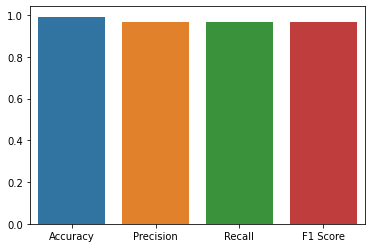

In [94]:
print("KNN Object different stats!")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])


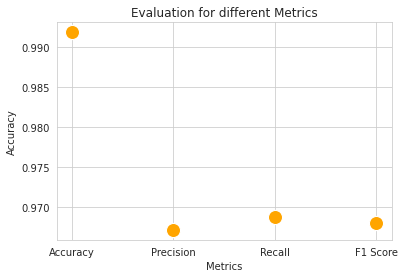

In [96]:
sns.set_style('whitegrid')
sns.scatterplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1], s=200, color='orange')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Evaluation for different Metrics')
plt.show()

# *Decision Treee*

In [97]:
DTC_Model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
C_Model_entropy.fit(X_train, y_train)

y_pred_entropy = DTC_Model_entropy.predict(X_test)


In [98]:
print("Decision Tree Object with different stats!")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))


Decision Tree Object with different stats!
Accuracy: 0.99
Precision: 0.97
Recall: 0.97
F1-score: 0.97


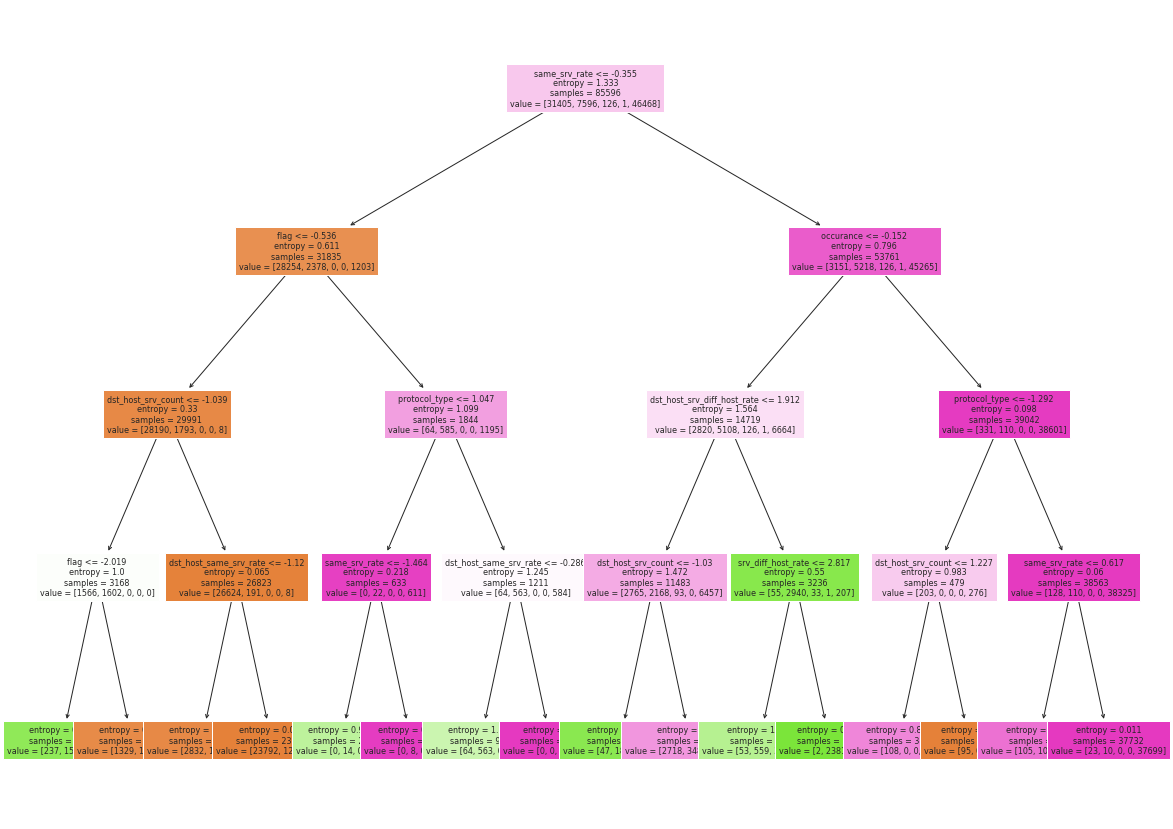

In [100]:
plt.figure(figsize=(20, 15))
DTC_tree_entropy = tree.plot_tree(DTC_Model_entropy, filled=True, feature_names=selected_features, fontsize=8)
plt.show()


<AxesSubplot: >

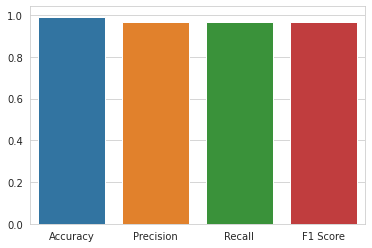

In [101]:
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])


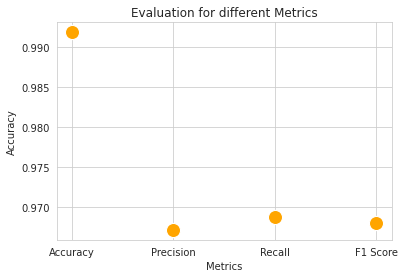

In [102]:
sns.set_style('whitegrid')
sns.scatterplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1], s=200, color='orange')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Evaluation for different Metrics')
plt.show()

#  *MLP- Multi layer Perceptron*

In [103]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, learning_rate_init=0.001)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

MLPClassifier(max_iter=300)

In [106]:
print("MLP Object with different stats!")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

MLP Object with different stats!
Accuracy: 0.99
Precision: 0.98
Recall: 0.95
F1-score: 0.97


<AxesSubplot: >

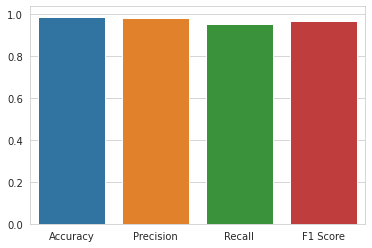

In [107]:
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])

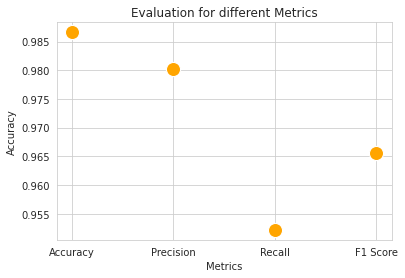

In [108]:
sns.set_style('whitegrid')
sns.scatterplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1], s=200, color='orange')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Evaluation for different Metrics')
plt.show()

In [110]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='sgd', max_iter=500, learning_rate_init=0.001)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, solver='sgd')

In [112]:
y_pred = mlp.predict(X_test)

In [114]:
print("MLP Object with different stats after Hyper tunning!")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))


MLP Object with different stats after Hyper tunning!
Accuracy: 0.99
Precision: 0.96
Recall: 0.96
F1-score: 0.96


<AxesSubplot: >

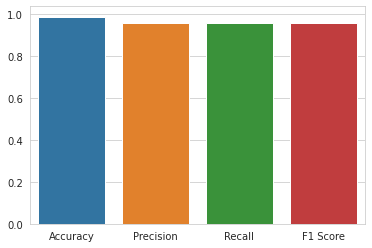

In [115]:
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])


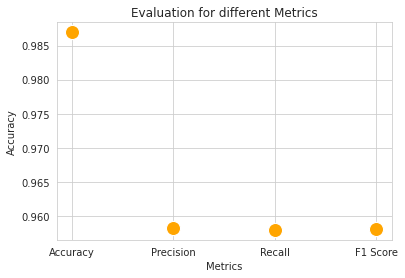

In [116]:
sns.set_style('whitegrid')
sns.scatterplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1], s=200, color='orange')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Evaluation for different Metrics')
plt.show()

# *K-means Clustering*

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85596 entries, 65182 to 121958
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   same_srv_rate                85596 non-null  float64
 1   dst_host_srv_count           85596 non-null  float64
 2   dst_host_same_srv_rate       85596 non-null  float64
 3   logged_in                    85596 non-null  float64
 4   flag                         85596 non-null  float64
 5   occurance                    85596 non-null  float64
 6   protocol_type                85596 non-null  float64
 7   srv_diff_host_rate           85596 non-null  float64
 8   is_guest_login               85596 non-null  float64
 9   hot                          85596 non-null  float64
 10  root_shell                   85596 non-null  float64
 11  num_failed_logins            85596 non-null  float64
 12  num_root                     85596 non-null  float64
 13  num_comprom

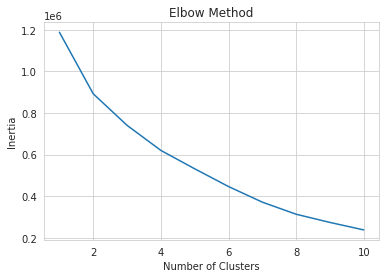

In [118]:
# Use elbow method to find optimal number of clusters
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X_train)
    SSE.append(kmeans.inertia_)
plt.plot(range(1, 11), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [119]:
# Based on elbow method, choose optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
kmeans.fit(X_train)


KMeans(n_clusters=2, n_init=20, random_state=42)

In [120]:
# Getting the cluster labels
cluster_labels = kmeans.labels_

# Printing the cluster labels
print(cluster_labels)

[1 0 1 ... 1 0 0]


In [121]:
unique_values = np.unique(cluster_labels)
print(unique_values)

[0 1]


In [122]:
freq = np.count_nonzero(cluster_labels == 0)
freq

38315

In [123]:
freq = np.count_nonzero(cluster_labels == 1)
freq

47281

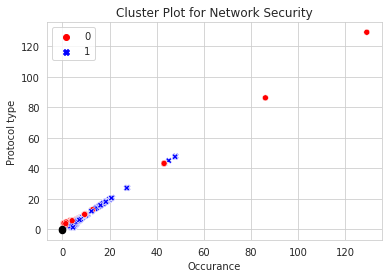

In [124]:
# Assume kmeans is already fit and has transformed the data
cluster_centers = kmeans.cluster_centers_
X_transformed = kmeans.transform(X_train)

# Create scatter plot using transformed data
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=kmeans.labels_, style=kmeans.labels_, 
                palette=['red', 'blue'], data=X_train)
plt.scatter(cluster_centers[:, 6], cluster_centers[:, 7], marker='o', s=20, linewidth=3, color='black')
plt.title('Cluster Plot for Network Security')
plt.xlabel('Occurance')
plt.ylabel('Protocol type')
plt.show()


In [125]:
X_transformed

array([[4.46240256, 1.15425457],
       [0.91518479, 4.16260748],
       [4.51884785, 1.05607499],
       ...,
       [4.43049888, 1.30163567],
       [4.11240118, 5.65610078],
       [1.41482751, 3.73815965]])